### Early warning and predictive maintenance system

In [117]:
# Importing relevant packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# importing dataset
data=pd.read_csv('C:/Users/deepak/Documents/aam case study/OP180NVHMaint_20202707.csv')

In [119]:
data.shape

(456124, 10)

In [120]:
data

,SITENAME,LINENAME,STATIONNAME,PARTNUMBER,STATUS,TOPLEVELSERIALNUMBER,PROD_TIMESTAMP,COLLID,CHARDESC,CHARVALUE
0,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01A200240722,2020-01-27 00:00:23.453,-1277705445,NVH Torque Sweep Test Cycle Count,1.000
1,GMCFULL,T1XX Front Axle FA HiV,OP180A,40217206,A,01A200250294,2020-01-27 10:18:28.180,-1277496047,NVH Torque Sweep Test Cycle Count,1.000
2,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01A200240856,2020-01-27 05:16:01.673,-1277603951,NVH Torque Sweep Test Cycle Count,1.000
3,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217206,A,01A200250299,2020-01-27 11:00:14.180,-1277482133,NVH Torque Sweep Test Cycle Count,1.000
4,GMCFULL,T1XX Front Axle FA HiV,OP180A,40217206,A,01C200250128,2020-01-27 10:58:28.993,-1277482173,NVH Torque Sweep Test Cycle Count,1.000
5,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01C200140771,2020-01-27 09:20:30.493,-1277515757,NVH Torque Sweep Test Cycle Count,1.000
6,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01A200230993,2020-01-25 13:51:46.293,-1277873227,NVH Torque Sweep Test Cycle Count,1.000
7,GMCFULL,T1XX Front Axle FA HiV,OP180A,40217205,A,01A200220255,2020-01-25 19:53:22.333,-1277767687,NVH Torque Sweep Test Cycle Count,1.000
8,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01A200230640,2020-01-27 08:53:51.467,-1277526755,NVH Torque Sweep Test Cycle Count,1.000
9,GMCFULL,T1XX Front Axle FA HiV,OP180B,40217205,A,01A200250361,2020-01-27 04:04:37.293,-1277627161,NVH Torque Sweep Test Cycle Count,1.000


In [121]:
data.STATUS.value_counts()

A    455501
X       623
Name: STATUS, dtype: int64

In [122]:
data.COLLID.value_counts()

-1234161670    4
-1234511050    4
-1232794259    4
-1237296282    4
-1245137660    4
-1236413066    4
-1246382726    4
-1251933363    4
-1243012279    4
-1236644475    4
-1247634626    4
-1232446073    4
-1253915851    4
-1251639965    4
-1234031223    4
-1244992720    4
-1237183697    4
-1254483154    4
-1238760659    4
-1251328629    4
-1251322652    4
-1249919618    4
-1253866723    4
-1244951780    4
-1254087831    4
-1250948244    4
-1245687193    4
-1240083989    4
-1247409236    4
-1239528540    4
              ..
-1278252647    1
-1254674030    1
-1265348098    1
-1276639764    1
-1263750814    1
-1277099738    1
-1272120597    1
-1282610455    1
-1277392155    1
-1257923897    1
-1279935805    1
-1270478155    1
-1267858764    1
-1266476312    1
-1273570641    1
-1277760855    1
-1255200111    1
-1269853562    1
-1272429956    1
-1282928010    1
-1279751579    1
-1260832173    1
-1272325553    1
-1271807412    1
-1255564729    1
-1273910719    1
-1274908102    1
-1276495309   

In [123]:
data.CHARDESC.value_counts()

NVH Torque Sweep Test Cycle Count    175762
RH Slide To Full Depth Posn           93454
Pinion Slide To Full Depth Posn       93454
LH Slide To Full Depth Posn           93454
Name: CHARDESC, dtype: int64

In [124]:
data.CHARVALUE.value_counts()

1.000       175212
1095.360       994
1095.350       990
1095.310       970
1095.390       956
1095.320       949
1095.400       948
1095.370       947
1095.330       945
1095.300       938
1095.340       934
1095.380       931
1095.420       878
1095.440       870
1095.430       859
1095.290       853
1095.410       853
1095.450       839
1095.460       836
1095.270       816
1095.490       797
1095.280       792
1095.470       763
1095.480       758
1095.500       744
1095.520       701
1095.260       693
1095.510       692
1095.530       687
1095.540       676
             ...  
250.081          1
243.498          1
249.734          1
1111.780         1
242.784          1
250.044          1
247.071          1
1082.620         1
249.859          1
242.798          1
243.262          1
242.738          1
247.198          1
247.503          1
247.068          1
246.676          1
246.693          1
252.811          1
250.280          1
242.752          1
250.235          1
246.571     

In [125]:
### Dropping SITENAME	LINENAME	STATIONNAME	 (As they are provided as constant value)
data.drop(['SITENAME','LINENAME','STATIONNAME'],axis=1,inplace=True)

In [126]:
data.dtypes

PARTNUMBER                int64
STATUS                   object
TOPLEVELSERIALNUMBER     object
PROD_TIMESTAMP           object
COLLID                    int64
CHARDESC                 object
CHARVALUE               float64
dtype: object

In [127]:
#Creating predictive variable
def predictive_var(row):
    if row['CHARDESC']=='NVH Torque Sweep Test Cycle Count' and row['STATUS']=='A' and row['CHARVALUE']>1:
        return 1
    else:
        return 0

data['false_reject']=data.apply(predictive_var,axis=1)

In [128]:
#Looking at distribution of false reject vs others
data.false_reject.value_counts()

0    455750
1       374
Name: false_reject, dtype: int64

In [129]:
data.groupby(['PARTNUMBER']).agg({'TOPLEVELSERIALNUMBER':'count'})

,TOPLEVELSERIALNUMBER
PARTNUMBER,
40217205,368819
40217206,79778
40217207,7527


In [130]:
#Checking for missing value
data.isnull().sum() #No missing value in data

PARTNUMBER              0
STATUS                  0
TOPLEVELSERIALNUMBER    0
PROD_TIMESTAMP          0
COLLID                  0
CHARDESC                0
CHARVALUE               0
false_reject            0
dtype: int64

In [131]:
#Checking skewness of data
data.skew()

PARTNUMBER       1.986820
COLLID          -1.066540
CHARVALUE        0.423060
false_reject    34.879675
dtype: float64

In [132]:
#Convert PROD_TIMESTAMP(object) into date time
data['PROD_TIMESTAMP']=pd.to_datetime(data["PROD_TIMESTAMP"]) 

In [133]:
data.head()

,PARTNUMBER,STATUS,TOPLEVELSERIALNUMBER,PROD_TIMESTAMP,COLLID,CHARDESC,CHARVALUE,false_reject
0,40217205,A,01A200240722,2020-01-27 00:00:23.453,-1277705445,NVH Torque Sweep Test Cycle Count,1.0,0
1,40217206,A,01A200250294,2020-01-27 10:18:28.180,-1277496047,NVH Torque Sweep Test Cycle Count,1.0,0
2,40217205,A,01A200240856,2020-01-27 05:16:01.673,-1277603951,NVH Torque Sweep Test Cycle Count,1.0,0
3,40217206,A,01A200250299,2020-01-27 11:00:14.180,-1277482133,NVH Torque Sweep Test Cycle Count,1.0,0
4,40217206,A,01C200250128,2020-01-27 10:58:28.993,-1277482173,NVH Torque Sweep Test Cycle Count,1.0,0


### Data prep approach for Xgboost and Random forest

##### 1. Dummy creation for low cardinal variables
##### 2. For high cardinal variable try label encoding
##### 3. Feature engineering on timestamp to create more date features
##### 4. Removing 'STATUS' since it already declare variables as True or False reject

In [134]:
data1=data

#Dropping variable 'STATUS'
data1=data1.drop(['STATUS'],axis=1)

#Creating dummy variable (N-1) for PARTNUMBER and CHARDESC (since they have less cardinality)
data1=pd.get_dummies(data1,columns=['PARTNUMBER','CHARDESC'],drop_first=True)

#Applying label encoder on TOPLEVELSERIALNUMBER
le = preprocessing.LabelEncoder()
data1['TOPLEVELSERIALNUMBER']=le.fit_transform(data1['TOPLEVELSERIALNUMBER'])

#Replacing column space with underscore
data1.columns = data1.columns.str.replace(' ', '_')

#Creating features from Timestamp
data1['month']=data1['PROD_TIMESTAMP'].dt.month
data1['week']=data1['PROD_TIMESTAMP'].dt.week
data1['day']=data1['PROD_TIMESTAMP'].dt.day
data1['hour']=data1['PROD_TIMESTAMP'].dt.hour
data1['minute']=data1['PROD_TIMESTAMP'].dt.minute
data1['second']=data1['PROD_TIMESTAMP'].dt.second
data1['week']=data1['PROD_TIMESTAMP'].dt.week
data1['weekday']=data1['PROD_TIMESTAMP'].dt.weekday
data1['dayofyear']=data1['PROD_TIMESTAMP'].dt.dayofyear

x1=data1.drop(['PROD_TIMESTAMP','false_reject'],axis=1)
y1=data[['false_reject']]

# Train-Test split
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1,y1, test_size=0.33, random_state=42)

print('x_train1',x_train1.shape)
print('y_train1',y_train1.shape)
print('*'*50)
print('x_test1',x_test1.shape)
print('y_test1',y_test1.shape)

x_train1 (305603, 16)
y_train1 (305603, 1)
**************************************************
x_test1 (150521, 16)
y_test1 (150521, 1)


###### Trying Random forest 

In [20]:
#Random search cv
n_estimators=list(range(120,1300,100))
max_depth=list(range(1,31,1))
min_samples_split=list(range(1,100,2))
min_samples_leaf=list(range(1,15,2))
weight=[None,'balanced']

param_distributions = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,class_weight=weight)
print(param_distributions)

# instantiate and fit the grid
grid = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv=5, scoring='f1', n_iter=30,return_train_score=False,n_jobs=-1)

{'n_estimators': [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020, 1120, 1220], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13], 'class_weight': [None, 'balanced']}


In [238]:
grid.fit(x_train1,y_train1)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8140063665785569
{'n_estimators': 1020, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 27, 'class_weight': 'balanced'}


In [240]:
#{'n_estimators': 1020, 'min_samples_split': 3, 'min_samples_leaf': 5, 'max_depth': 27, 'class_weight': 'balanced'}
rf_optimal=RandomForestClassifier(n_estimators=1020,min_samples_split=3,min_samples_leaf=5,max_depth=27,class_weight='balanced')

# fitting the model
rf_optimal.fit(x_train1, y_train1)

# predict the response
pred_train = rf_optimal.predict(x_train1)
pred_test = rf_optimal.predict(x_test1)

# evaluate f1_score
f1_score_train = f1_score(y_train1,pred_train)
f1_score_test = f1_score(y_test1,pred_test)

C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [241]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.8248407643312102
test f1 score:  0.8308823529411764


In [250]:
# get importance
feat_importances = pd.Series(rf_optimal.feature_importances_, index=x_train1.columns)
feat_importances

TOPLEVELSERIALNUMBER                          0.015327
COLLID                                        0.044739
CHARVALUE                                     0.560418
PARTNUMBER_40217206                           0.001291
PARTNUMBER_40217207                           0.000861
CHARDESC_NVH_Torque_Sweep_Test_Cycle_Count    0.212734
CHARDESC_Pinion_Slide_To_Full_Depth_Posn      0.026931
CHARDESC_RH_Slide_To_Full_Depth_Posn          0.027832
month                                         0.009075
week                                          0.019871
day                                           0.026334
hour                                          0.007449
minute                                        0.005966
second                                        0.006938
weekday                                       0.003882
dayofyear                                     0.030354
dtype: float64

In [21]:
#Top 9 features account for 97% feature importance. So trying next iteration only on them
x_train2=x_train1.drop(['month','hour','second','minute','weekday','PARTNUMBER_40217206','PARTNUMBER_40217207'],axis=1)
x_test2=x_test1.drop(['month','hour','second','minute','weekday','PARTNUMBER_40217206','PARTNUMBER_40217207'],axis=1)

In [22]:
grid.fit(x_train2,y_train1)

# examines the best model
print(grid.best_score_)
print(grid.best_params_)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.8198645503296522
{'n_estimators': 220, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8, 'class_weight': 'balanced'}


In [26]:
#{'n_estimators': 220, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8, 'class_weight': 'balanced'}
rf_optimal=RandomForestClassifier(n_estimators=220,min_samples_split=3,min_samples_leaf=3,max_depth=8,class_weight='balanced')

# fitting the model
rf_optimal.fit(x_train2, y_train1)

# predict the response
pred_train = rf_optimal.predict(x_train2)
pred_test = rf_optimal.predict(x_test2)

# evaluate f1_score
f1_score_train = f1_score(y_train1,pred_train)
f1_score_test = f1_score(y_test1,pred_test)

C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [27]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.8313458262350937
test f1 score:  0.8220064724919094


In [28]:
# save the model to disk
filename = 'rf_model.sav'
pickle.dump(rf_optimal, open(filename, 'wb'))

###### Trying Xgboost 

In [23]:
n_estimators=list(range(100,1100,100))
max_depth=list(range(3,25,2))
learning_rate=[0.01,0.015,0.025,0.05,0.1]
gamma=[0.05,0.1,0.3,0.5,0.7,.9,1.0]
min_child_weight =[1,3,5,7]
subsample=[0.5,0.6,0.7,0.8,0.9,1.0]
colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1.0]
scale_pos_weight=list(range(1,5,1))

param_distributions  = dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,gamma=gamma,
                           min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight)
print(param_distributions)

# instantiate and fit the grid
grid_xgb = RandomizedSearchCV(XGBClassifier(), param_distributions, cv=5, scoring='f1', return_train_score=False,n_jobs=-1)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0], 'min_child_weight': [1, 3, 5, 7], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'scale_pos_weight': [1, 2, 3, 4]}


In [24]:
grid_xgb.fit(x_train2,y_train1)

# examine the best model
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8246169110301149
{'subsample': 0.6, 'scale_pos_weight': 4, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}


In [29]:
#{'subsample': 0.6, 'scale_pos_weight': 4, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
xgb_optimal=XGBClassifier(subsample=0.6,scale_pos_weight=4,n_estimators=200,min_child_weight=5,max_depth=7,learning_rate=0.1,gamma=0.1,colsample_bytree=0.7)

# fitting the model
xgb_optimal.fit(x_train2, y_train1)

# predict the response
pred_train = xgb_optimal.predict(x_train2)
pred_test = xgb_optimal.predict(x_test2)

# evaluate f1_score
f1_score_train = f1_score(y_train1,pred_train)
f1_score_test = f1_score(y_test1,pred_test)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.8694096601073346
test f1 score:  0.8223684210526315


In [31]:
# save the model to disk
filename = 'xgb_model.sav'
pickle.dump(xgb_optimal, open(filename, 'wb'))

#### Trying Catboost

In [135]:
data1_cat=data

#Dropping variable 'STATUS'
data1_cat=data1_cat.drop(['STATUS'],axis=1)

data1_cat=data1_cat.sort_values(by=['PROD_TIMESTAMP'])

# Train-Test split as 70%-30%
x1_cat=data1_cat.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y1_cat=data1_cat[['false_reject']]

#Train-Test split as 70%-30%
x_train1_cat, x_test1_cat, y_train1_cat, y_test1_cat = train_test_split(x1_cat, y1_cat, test_size=0.33, random_state=42)

print('x_train1_cat',x_train1_cat.shape)
print('y_train1_cat',y_train1_cat.shape)
print('*'*50)
print('x_test1_cat',x_test1_cat.shape)
print('y_test1_cat',y_test1_cat.shape)

x_train1_cat (305603, 5)
y_train1_cat (305603, 1)
**************************************************
x_test1_cat (150521, 5)
y_test1_cat (150521, 1)


In [77]:
x_train1_cat.head()

,PARTNUMBER,TOPLEVELSERIALNUMBER,COLLID,CHARDESC,CHARVALUE
285460,40217205,01C201840020,-1241323275,NVH Torque Sweep Test Cycle Count,1.000
233631,40217206,01A201730093,-1245469785,LH Slide To Full Depth Posn,1086.110
447739,40217205,01A201950601,-1237338639,Pinion Slide To Full Depth Posn,244.294
127650,40217205,01A201890050,-1239214977,LH Slide To Full Depth Posn,1086.830
322646,40217205,01A200830474,-1254032824,NVH Torque Sweep Test Cycle Count,1.000


In [33]:
cat_features = ['PARTNUMBER','TOPLEVELSERIALNUMBER','CHARDESC']

params = {'depth':[3,1,2,6,4,5,7,8,9,10],
              'iterations':[250,100,500,1000],
              'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
              'l2_leaf_reg':[3,1,5,10,100],
              'border_count':[32,5,10,20,50,100,200],
              'bagging_temperature':[0.03,0.09,0.25,0.75],
              'random_strength':[0.2,0.5,0.8],
              'max_ctr_complexity':[1,2,3,4,5] }

# param_distributions  = dict(depth=depth,iterations=iterations,learning_rate=learning_rate,
#                            l2_leaf_reg=l2_leaf_reg,border_count=border_count,bagging_temperature=bagging_temperature,
#                            random_strength=random_strength,max_ctr_complexity=max_ctr_complexity)
print(params)

# instantiate and fit the grid
grid_cat = RandomizedSearchCV(CatBoostClassifier(), params, cv=5, scoring='f1', return_train_score=False,n_jobs=-1)

{'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10], 'iterations': [250, 100, 500, 1000], 'learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3], 'l2_leaf_reg': [3, 1, 5, 10, 100], 'border_count': [32, 5, 10, 20, 50, 100, 200], 'bagging_temperature': [0.03, 0.09, 0.25, 0.75], 'random_strength': [0.2, 0.5, 0.8], 'max_ctr_complexity': [1, 2, 3, 4, 5]}


In [34]:
grid_cat.fit(x_train1_cat ,y_train1_cat,cat_features=cat_features)

# examine the best model
print(grid_cat.best_score_)
print(grid_cat.best_params_)

0:	learn: 0.6579548	total: 123ms	remaining: 1m 1s
1:	learn: 0.6218734	total: 278ms	remaining: 1m 9s
2:	learn: 0.5812622	total: 381ms	remaining: 1m 3s
3:	learn: 0.5444706	total: 503ms	remaining: 1m 2s
4:	learn: 0.5163501	total: 607ms	remaining: 1m
5:	learn: 0.4895237	total: 678ms	remaining: 55.8s
6:	learn: 0.4569395	total: 768ms	remaining: 54.1s
7:	learn: 0.4262517	total: 908ms	remaining: 55.8s
8:	learn: 0.4041017	total: 957ms	remaining: 52.2s
9:	learn: 0.3786532	total: 1.08s	remaining: 52.8s
10:	learn: 0.3530287	total: 1.2s	remaining: 53.2s
11:	learn: 0.3300199	total: 1.27s	remaining: 51.6s
12:	learn: 0.3028755	total: 1.38s	remaining: 51.6s
13:	learn: 0.2830097	total: 1.55s	remaining: 53.9s
14:	learn: 0.2592265	total: 1.72s	remaining: 55.7s
15:	learn: 0.2421947	total: 1.8s	remaining: 54.4s
16:	learn: 0.2218445	total: 1.91s	remaining: 54.3s
17:	learn: 0.2028608	total: 1.97s	remaining: 52.7s
18:	learn: 0.1854447	total: 2.02s	remaining: 51.2s
19:	learn: 0.1700313	total: 2.08s	remaining: 4

162:	learn: 0.0003971	total: 11.3s	remaining: 23.4s
163:	learn: 0.0003955	total: 11.4s	remaining: 23.4s
164:	learn: 0.0003937	total: 11.5s	remaining: 23.3s
165:	learn: 0.0003915	total: 11.5s	remaining: 23.2s
166:	learn: 0.0003893	total: 11.6s	remaining: 23.1s
167:	learn: 0.0003877	total: 11.7s	remaining: 23.1s
168:	learn: 0.0003862	total: 11.8s	remaining: 23.2s
169:	learn: 0.0003846	total: 12s	remaining: 23.2s
170:	learn: 0.0003831	total: 12s	remaining: 23.1s
171:	learn: 0.0003816	total: 12.1s	remaining: 23s
172:	learn: 0.0003802	total: 12.1s	remaining: 22.9s
173:	learn: 0.0003788	total: 12.2s	remaining: 22.8s
174:	learn: 0.0003775	total: 12.3s	remaining: 22.8s
175:	learn: 0.0003762	total: 12.3s	remaining: 22.7s
176:	learn: 0.0003748	total: 12.4s	remaining: 22.6s
177:	learn: 0.0003736	total: 12.4s	remaining: 22.5s
178:	learn: 0.0003726	total: 12.5s	remaining: 22.4s
179:	learn: 0.0003714	total: 12.5s	remaining: 22.3s
180:	learn: 0.0003702	total: 12.6s	remaining: 22.2s
181:	learn: 0.0003

321:	learn: 0.0003000	total: 26.3s	remaining: 14.5s
322:	learn: 0.0002999	total: 26.4s	remaining: 14.5s
323:	learn: 0.0002997	total: 26.5s	remaining: 14.4s
324:	learn: 0.0002995	total: 26.6s	remaining: 14.3s
325:	learn: 0.0002993	total: 26.7s	remaining: 14.2s
326:	learn: 0.0002992	total: 26.8s	remaining: 14.2s
327:	learn: 0.0002991	total: 26.9s	remaining: 14.1s
328:	learn: 0.0002989	total: 27s	remaining: 14s
329:	learn: 0.0002987	total: 27.1s	remaining: 14s
330:	learn: 0.0002982	total: 27.2s	remaining: 13.9s
331:	learn: 0.0002981	total: 27.2s	remaining: 13.8s
332:	learn: 0.0002979	total: 27.3s	remaining: 13.7s
333:	learn: 0.0002978	total: 27.5s	remaining: 13.7s
334:	learn: 0.0002976	total: 27.5s	remaining: 13.6s
335:	learn: 0.0002974	total: 27.6s	remaining: 13.5s
336:	learn: 0.0002973	total: 27.7s	remaining: 13.4s
337:	learn: 0.0002971	total: 27.8s	remaining: 13.3s
338:	learn: 0.0002970	total: 27.8s	remaining: 13.2s
339:	learn: 0.0002967	total: 27.9s	remaining: 13.1s
340:	learn: 0.0002

480:	learn: 0.0002752	total: 42.4s	remaining: 1.67s
481:	learn: 0.0002751	total: 42.4s	remaining: 1.58s
482:	learn: 0.0002751	total: 42.6s	remaining: 1.5s
483:	learn: 0.0002750	total: 42.6s	remaining: 1.41s
484:	learn: 0.0002746	total: 42.8s	remaining: 1.32s
485:	learn: 0.0002745	total: 42.9s	remaining: 1.24s
486:	learn: 0.0002743	total: 43s	remaining: 1.15s
487:	learn: 0.0002742	total: 43.1s	remaining: 1.06s
488:	learn: 0.0002741	total: 43.2s	remaining: 972ms
489:	learn: 0.0002740	total: 43.4s	remaining: 885ms
490:	learn: 0.0002739	total: 43.5s	remaining: 797ms
491:	learn: 0.0002737	total: 43.7s	remaining: 710ms
492:	learn: 0.0002736	total: 43.8s	remaining: 621ms
493:	learn: 0.0002735	total: 43.9s	remaining: 533ms
494:	learn: 0.0002734	total: 44s	remaining: 445ms
495:	learn: 0.0002734	total: 44.1s	remaining: 355ms
496:	learn: 0.0002731	total: 44.2s	remaining: 267ms
497:	learn: 0.0002729	total: 44.3s	remaining: 178ms
498:	learn: 0.0002728	total: 44.4s	remaining: 89.1ms
499:	learn: 0.00

In [136]:
#{'random_strength': 0.5, 'max_ctr_complexity': 5, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 500, 'depth': 4, 'border_count': 50, 'bagging_temperature': 0.25}
cat_optimal=CatBoostClassifier(random_strength=0.5,max_ctr_complexity=5,learning_rate=0.01,l2_leaf_reg=1,iterations=500,depth=4,border_count=50,bagging_temperature=0.25,cat_features=cat_features)

# fitting the model
cat_optimal.fit(x_train1_cat, y_train1_cat)

# predict the response
pred_train_cat = cat_optimal.predict(x_train1_cat)
pred_test_cat = cat_optimal.predict(x_test1_cat)

# evaluate f1_score
f1_score_train = f1_score(y_train1_cat,pred_train_cat)
f1_score_test = f1_score(y_test1_cat,pred_test_cat)

0:	learn: 0.6579548	total: 63.1ms	remaining: 31.5s
1:	learn: 0.6218734	total: 222ms	remaining: 55.3s
2:	learn: 0.5812622	total: 323ms	remaining: 53.4s
3:	learn: 0.5444706	total: 443ms	remaining: 54.9s
4:	learn: 0.5163501	total: 543ms	remaining: 53.8s
5:	learn: 0.4895237	total: 618ms	remaining: 50.9s
6:	learn: 0.4569395	total: 713ms	remaining: 50.2s
7:	learn: 0.4262517	total: 858ms	remaining: 52.8s
8:	learn: 0.4041017	total: 907ms	remaining: 49.5s
9:	learn: 0.3786532	total: 1.03s	remaining: 50.6s
10:	learn: 0.3530287	total: 1.15s	remaining: 51.3s
11:	learn: 0.3300199	total: 1.23s	remaining: 50s
12:	learn: 0.3028755	total: 1.35s	remaining: 50.4s
13:	learn: 0.2830097	total: 1.51s	remaining: 52.6s
14:	learn: 0.2592265	total: 1.68s	remaining: 54.4s
15:	learn: 0.2421947	total: 1.76s	remaining: 53.2s
16:	learn: 0.2218445	total: 1.88s	remaining: 53.3s
17:	learn: 0.2028608	total: 1.93s	remaining: 51.8s
18:	learn: 0.1854447	total: 1.99s	remaining: 50.3s
19:	learn: 0.1700313	total: 2.05s	remainin

162:	learn: 0.0003971	total: 11.8s	remaining: 24.4s
163:	learn: 0.0003955	total: 11.9s	remaining: 24.4s
164:	learn: 0.0003937	total: 12s	remaining: 24.4s
165:	learn: 0.0003915	total: 12.1s	remaining: 24.3s
166:	learn: 0.0003893	total: 12.1s	remaining: 24.2s
167:	learn: 0.0003877	total: 12.2s	remaining: 24.1s
168:	learn: 0.0003862	total: 12.3s	remaining: 24.2s
169:	learn: 0.0003846	total: 12.5s	remaining: 24.2s
170:	learn: 0.0003831	total: 12.5s	remaining: 24.1s
171:	learn: 0.0003816	total: 12.6s	remaining: 24.1s
172:	learn: 0.0003802	total: 12.7s	remaining: 24s
173:	learn: 0.0003788	total: 12.7s	remaining: 23.9s
174:	learn: 0.0003775	total: 12.8s	remaining: 23.8s
175:	learn: 0.0003762	total: 12.9s	remaining: 23.7s
176:	learn: 0.0003748	total: 12.9s	remaining: 23.6s
177:	learn: 0.0003736	total: 13s	remaining: 23.5s
178:	learn: 0.0003726	total: 13s	remaining: 23.4s
179:	learn: 0.0003714	total: 13.1s	remaining: 23.3s
180:	learn: 0.0003702	total: 13.2s	remaining: 23.2s
181:	learn: 0.000369

322:	learn: 0.0002999	total: 27.3s	remaining: 15s
323:	learn: 0.0002997	total: 27.4s	remaining: 14.9s
324:	learn: 0.0002995	total: 27.5s	remaining: 14.8s
325:	learn: 0.0002993	total: 27.6s	remaining: 14.7s
326:	learn: 0.0002992	total: 27.7s	remaining: 14.7s
327:	learn: 0.0002991	total: 27.8s	remaining: 14.6s
328:	learn: 0.0002989	total: 27.9s	remaining: 14.5s
329:	learn: 0.0002987	total: 28s	remaining: 14.4s
330:	learn: 0.0002982	total: 28.1s	remaining: 14.3s
331:	learn: 0.0002981	total: 28.2s	remaining: 14.2s
332:	learn: 0.0002979	total: 28.3s	remaining: 14.2s
333:	learn: 0.0002978	total: 28.4s	remaining: 14.1s
334:	learn: 0.0002976	total: 28.5s	remaining: 14s
335:	learn: 0.0002974	total: 28.6s	remaining: 14s
336:	learn: 0.0002973	total: 28.6s	remaining: 13.9s
337:	learn: 0.0002971	total: 28.8s	remaining: 13.8s
338:	learn: 0.0002970	total: 28.8s	remaining: 13.7s
339:	learn: 0.0002967	total: 28.9s	remaining: 13.6s
340:	learn: 0.0002966	total: 29s	remaining: 13.5s
341:	learn: 0.0002964	

481:	learn: 0.0002751	total: 43.4s	remaining: 1.62s
482:	learn: 0.0002751	total: 43.5s	remaining: 1.53s
483:	learn: 0.0002750	total: 43.6s	remaining: 1.44s
484:	learn: 0.0002746	total: 43.7s	remaining: 1.35s
485:	learn: 0.0002745	total: 43.8s	remaining: 1.26s
486:	learn: 0.0002743	total: 44s	remaining: 1.17s
487:	learn: 0.0002742	total: 44.1s	remaining: 1.08s
488:	learn: 0.0002741	total: 44.2s	remaining: 993ms
489:	learn: 0.0002740	total: 44.3s	remaining: 904ms
490:	learn: 0.0002739	total: 44.5s	remaining: 815ms
491:	learn: 0.0002737	total: 44.6s	remaining: 725ms
492:	learn: 0.0002736	total: 44.7s	remaining: 635ms
493:	learn: 0.0002735	total: 44.9s	remaining: 545ms
494:	learn: 0.0002734	total: 45s	remaining: 454ms
495:	learn: 0.0002734	total: 45s	remaining: 363ms
496:	learn: 0.0002731	total: 45.2s	remaining: 273ms
497:	learn: 0.0002729	total: 45.3s	remaining: 182ms
498:	learn: 0.0002728	total: 45.4s	remaining: 90.9ms
499:	learn: 0.0002728	total: 45.5s	remaining: 0us


In [67]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.9255533199195172
test f1 score:  0.8681672025723473


In [40]:
feature_importances = np.zeros(x_train1_cat.shape[1])
feat_labels=x_train1_cat.columns
feature_importances = cat_optimal.feature_importances_
feature_importances = pd.DataFrame({'feature': list(x_train1_cat.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances

,feature,importance
4,CHARVALUE,49.850916
2,COLLID,20.659215
3,CHARDESC,19.366638
1,TOPLEVELSERIALNUMBER,6.529930
0,PARTNUMBER,3.593301


In [138]:
# save the model to disk
pickle.dump(cat_optimal, open("cat_optimal.pkl", 'wb'))

### Downsampling on Training data

In [42]:
data2=data

#Dropping variable 'STATUS'
data2=data2.drop(['STATUS'],axis=1)

#Creating dummy variable (N-1) for PARTNUMBER and CHARDESC (since they have less cardinality)
data2=pd.get_dummies(data2,columns=['PARTNUMBER','CHARDESC'],drop_first=True)

#Applying label encoder on TOPLEVELSERIALNUMBER
le = preprocessing.LabelEncoder()
data2['TOPLEVELSERIALNUMBER']=le.fit_transform(data2['TOPLEVELSERIALNUMBER'])

#Replacing column space with underscore
data2.columns = data2.columns.str.replace(' ', '_')

x2=data2.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y2=data2[['false_reject']]

train_pct_index = int(0.7 * len(data2))
train_check = data2[:train_pct_index]
test_check = data2[train_pct_index:]

#Downsample train data by 
positive_label=train_check[train_check.false_reject==1]
negative_label=train_check[train_check.false_reject==0]
negative_label_sample=negative_label.sample(n=119094)

train_check_final=pd.concat([positive_label,negative_label_sample],ignore_index=True)
# train_check_final=train_check_final.sort_values(by=['PROD_TIMESTAMP'])

x_train_down=train_check_final.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y_train_down=train_check_final[['false_reject']]

x_test_down=test_check.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y_test_down=test_check[['false_reject']]

print('x_train_down',x_train_down.shape)
print('y_train_down',y_train_down.shape)
print('*'*50)
print('x_test_down',x_test_down.shape)
print('y_test_down',y_test_down.shape)

x_train_down (119319, 8)
y_train_down (119319, 1)
**************************************************
x_test_down (136838, 8)
y_test_down (136838, 1)


#### Trying RF with downsample

In [43]:
n_estimators=list(range(120,1300,100))
max_depth=list(range(1,31,1))
min_samples_split=list(range(1,100,2))
min_samples_leaf=list(range(1,15,2))
weight=[None,'balanced']

param_distributions = dict(n_estimators=n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,class_weight=weight)
print(param_distributions)

# instantiate and fit the grid
grid_rf_ds = RandomizedSearchCV(RandomForestClassifier(), param_distributions, cv=5, scoring='f1',n_jobs=-1)

grid_rf_ds.fit(x_train_down ,y_train_down )

# examine the best model
print(grid_rf_ds.best_score_)
print(grid_rf_ds.best_params_)

{'n_estimators': [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020, 1120, 1220], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'min_samples_split': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67, 69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99], 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13], 'class_weight': [None, 'balanced']}


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


0.9338769949974426
{'n_estimators': 520, 'min_samples_split': 31, 'min_samples_leaf': 11, 'max_depth': 9, 'class_weight': 'balanced'}


In [61]:
#{'n_estimators': 520, 'min_samples_split': 31, 'min_samples_leaf': 11, 'max_depth': 9, 'class_weight': 'balanced'}
rf_optimal_ds=RandomForestClassifier(n_estimators=520,min_samples_split=31,min_samples_leaf=11,max_depth=9,class_weight='balanced')

# fitting the model
rf_optimal_ds.fit(x_train_down, y_train_down)

# predict the response
pred_train = rf_optimal_ds.predict(x_train_down)
pred_test = rf_optimal_ds.predict(x_test_down)

# evaluate f1_score
f1_score_train = f1_score(y_train_down,pred_train)
f1_score_test = f1_score(y_test_down,pred_test)

C:\Users\deepak\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [62]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.9336099585062241
test f1 score:  0.8465909090909091


#### Trying XGBOOST with downsample

In [44]:
n_estimators=list(range(100,1100,100))
max_depth=list(range(3,25,2))
learning_rate=[0.01,0.015,0.025,0.05,0.1]
gamma=[0.05,0.1,0.3,0.5,0.7,.9,1.0]
min_child_weight =[1,3,5,7]
subsample=[0.5,0.6,0.7,0.8,0.9,1.0]
colsample_bytree=[0.5,0.6,0.7,0.8,0.9,1.0]
scale_pos_weight=list(range(1,5,1))

param_distributions  = dict(n_estimators=n_estimators,max_depth=max_depth,learning_rate=learning_rate,gamma=gamma,
                           min_child_weight=min_child_weight,subsample=subsample,colsample_bytree=colsample_bytree,
                           scale_pos_weight=scale_pos_weight)
print(param_distributions)

# instantiate and fit the grid
grid_xgb_ds = RandomizedSearchCV(XGBClassifier(), param_distributions, cv=5, scoring='f1', return_train_score=False,n_jobs=-1)

grid_xgb_ds.fit(x_train_down ,y_train_down )

# examine the best model
print(grid_xgb_ds.best_score_)
print(grid_xgb_ds.best_params_)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23], 'learning_rate': [0.01, 0.015, 0.025, 0.05, 0.1], 'gamma': [0.05, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0], 'min_child_weight': [1, 3, 5, 7], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'scale_pos_weight': [1, 2, 3, 4]}


C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9338769949974426
{'subsample': 1.0, 'scale_pos_weight': 2, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1.0, 'colsample_bytree': 1.0}


In [63]:
#{'subsample': 1.0, 'scale_pos_weight': 2, 'n_estimators': 500, 'min_child_weight': 7, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 1.0, 'colsample_bytree': 1.0}
xgb_ds=XGBClassifier(subsample=1.0,scale_pos_weight=2,n_estimators=500,min_child_weight=7,max_depth=3,learning_rate=0.01,gamma=1.0,colsample_bytree=1.0)

# fitting the model
xgb_ds.fit(x_train_down, y_train_down)

# predict the response
pred_train = xgb_ds.predict(x_train_down)
pred_test = xgb_ds.predict(x_test_down)

# evaluate f1_score
f1_score_train = f1_score(y_train_down,pred_train)
f1_score_test = f1_score(y_test_down,pred_test)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.9336099585062241
test f1 score:  0.8465909090909091


#### Trying Catboost with downsample

In [45]:
data2_cat_ds=data

#Dropping variable 'STATUS'
data2_cat_ds=data2_cat_ds.drop(['STATUS'],axis=1)

train_pct_index_cat_ds = int(0.7 * len(data2_cat_ds))
train_check_cat_ds = data2_cat_ds[:train_pct_index_cat_ds]
test_check_cat_ds = data2_cat_ds[train_pct_index_cat_ds:]

#Downsample train data by 
positive_label_cat_ds=train_check_cat_ds[train_check_cat_ds.false_reject==1]
negative_label_cat_ds=train_check_cat_ds[train_check_cat_ds.false_reject==0]
negative_label_sample_cat_ds=negative_label_cat_ds.sample(n=119094)

train_check_final_cat_ds=pd.concat([positive_label_cat_ds,negative_label_sample_cat_ds],ignore_index=True)
# train_check_final_cat_ds=train_check_final_cat_ds.sort_values(by=['PROD_TIMESTAMP'])

x_train_down_cat_ds=train_check_final_cat_ds.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y_train_down_cat_ds=train_check_final_cat_ds[['false_reject']]

x_test_down_cat_ds=test_check_cat_ds.drop(['false_reject','PROD_TIMESTAMP'],axis=1)
y_test_down_cat_ds=test_check_cat_ds[['false_reject']]

print('x_train_down_cat_ds',x_train_down_cat_ds.shape)
print('y_train_down_cat_ds',y_train_down_cat_ds.shape)
print('*'*50)
print('x_test_down_cat_ds',x_test_down_cat_ds.shape)
print('y_test_down_cat_ds',y_test_down_cat_ds.shape)

cat_features = ['PARTNUMBER','TOPLEVELSERIALNUMBER','CHARDESC']

params = {'depth':[3,1,2,6,4,5,7,8,9,10],
              'iterations':[250,100,500,1000],
              'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
              'l2_leaf_reg':[3,1,5,10,100],
              'border_count':[32,5,10,20,50,100,200],
              'bagging_temperature':[0.03,0.09,0.25,0.75],
              'random_strength':[0.2,0.5,0.8],
              'max_ctr_complexity':[1,2,3,4,5] }

# param_distributions  = dict(depth=depth,iterations=iterations,learning_rate=learning_rate,
#                            l2_leaf_reg=l2_leaf_reg,border_count=border_count,bagging_temperature=bagging_temperature,
#                            random_strength=random_strength,max_ctr_complexity=max_ctr_complexity)
print(params)

# instantiate and fit the grid
grid_cat_ds = RandomizedSearchCV(CatBoostClassifier(), params, cv=5, scoring='f1', return_train_score=False,n_jobs=-1)

grid_cat_ds.fit(x_train_down_cat_ds,y_train_down_cat_ds,cat_features=cat_features)

# examine the best model
print(grid_cat_ds.best_score_)
print(grid_cat_ds.best_params_)


x_train_down_cat_ds (119319, 5)
y_train_down_cat_ds (119319, 1)
**************************************************
x_test_down_cat_ds (136838, 5)
y_test_down_cat_ds (136838, 1)
{'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10], 'iterations': [250, 100, 500, 1000], 'learning_rate': [0.03, 0.001, 0.01, 0.1, 0.2, 0.3], 'l2_leaf_reg': [3, 1, 5, 10, 100], 'border_count': [32, 5, 10, 20, 50, 100, 200], 'bagging_temperature': [0.03, 0.09, 0.25, 0.75], 'random_strength': [0.2, 0.5, 0.8], 'max_ctr_complexity': [1, 2, 3, 4, 5]}
0:	learn: 0.1447779	total: 47.3ms	remaining: 47.3s
1:	learn: 0.0460805	total: 84.6ms	remaining: 42.2s
2:	learn: 0.0237952	total: 120ms	remaining: 39.9s
3:	learn: 0.0172140	total: 168ms	remaining: 41.9s
4:	learn: 0.0081996	total: 201ms	remaining: 40s
5:	learn: 0.0045346	total: 243ms	remaining: 40.3s
6:	learn: 0.0029233	total: 286ms	remaining: 40.5s
7:	learn: 0.0020231	total: 322ms	remaining: 40s
8:	learn: 0.0015860	total: 344ms	remaining: 37.9s
9:	learn: 0.0013525	total: 394ms	rem

154:	learn: 0.0008338	total: 3.49s	remaining: 19s
155:	learn: 0.0008327	total: 3.51s	remaining: 19s
156:	learn: 0.0008321	total: 3.53s	remaining: 19s
157:	learn: 0.0008313	total: 3.55s	remaining: 18.9s
158:	learn: 0.0008308	total: 3.57s	remaining: 18.9s
159:	learn: 0.0008307	total: 3.59s	remaining: 18.9s
160:	learn: 0.0008302	total: 3.61s	remaining: 18.8s
161:	learn: 0.0008299	total: 3.63s	remaining: 18.8s
162:	learn: 0.0008297	total: 3.65s	remaining: 18.7s
163:	learn: 0.0008295	total: 3.67s	remaining: 18.7s
164:	learn: 0.0008292	total: 3.69s	remaining: 18.7s
165:	learn: 0.0008287	total: 3.71s	remaining: 18.6s
166:	learn: 0.0008278	total: 3.73s	remaining: 18.6s
167:	learn: 0.0008253	total: 3.77s	remaining: 18.7s
168:	learn: 0.0008252	total: 3.79s	remaining: 18.6s
169:	learn: 0.0008243	total: 3.81s	remaining: 18.6s
170:	learn: 0.0008242	total: 3.83s	remaining: 18.6s
171:	learn: 0.0008233	total: 3.85s	remaining: 18.5s
172:	learn: 0.0008207	total: 3.88s	remaining: 18.5s
173:	learn: 0.0008

316:	learn: 0.0007460	total: 6.87s	remaining: 14.8s
317:	learn: 0.0007459	total: 6.89s	remaining: 14.8s
318:	learn: 0.0007459	total: 6.92s	remaining: 14.8s
319:	learn: 0.0007459	total: 6.93s	remaining: 14.7s
320:	learn: 0.0007458	total: 6.96s	remaining: 14.7s
321:	learn: 0.0007458	total: 6.98s	remaining: 14.7s
322:	learn: 0.0007458	total: 7.01s	remaining: 14.7s
323:	learn: 0.0007453	total: 7.03s	remaining: 14.7s
324:	learn: 0.0007438	total: 7.05s	remaining: 14.6s
325:	learn: 0.0007438	total: 7.07s	remaining: 14.6s
326:	learn: 0.0007437	total: 7.09s	remaining: 14.6s
327:	learn: 0.0007437	total: 7.11s	remaining: 14.6s
328:	learn: 0.0007436	total: 7.13s	remaining: 14.5s
329:	learn: 0.0007436	total: 7.14s	remaining: 14.5s
330:	learn: 0.0007432	total: 7.17s	remaining: 14.5s
331:	learn: 0.0007431	total: 7.19s	remaining: 14.5s
332:	learn: 0.0007428	total: 7.21s	remaining: 14.4s
333:	learn: 0.0007428	total: 7.23s	remaining: 14.4s
334:	learn: 0.0007417	total: 7.25s	remaining: 14.4s
335:	learn: 

475:	learn: 0.0007249	total: 10.1s	remaining: 11.1s
476:	learn: 0.0007248	total: 10.1s	remaining: 11.1s
477:	learn: 0.0007248	total: 10.1s	remaining: 11s
478:	learn: 0.0007248	total: 10.1s	remaining: 11s
479:	learn: 0.0007248	total: 10.1s	remaining: 11s
480:	learn: 0.0007248	total: 10.2s	remaining: 11s
481:	learn: 0.0007248	total: 10.2s	remaining: 10.9s
482:	learn: 0.0007248	total: 10.2s	remaining: 10.9s
483:	learn: 0.0007248	total: 10.2s	remaining: 10.9s
484:	learn: 0.0007248	total: 10.2s	remaining: 10.9s
485:	learn: 0.0007248	total: 10.3s	remaining: 10.8s
486:	learn: 0.0007248	total: 10.3s	remaining: 10.8s
487:	learn: 0.0007248	total: 10.3s	remaining: 10.8s
488:	learn: 0.0007248	total: 10.3s	remaining: 10.8s
489:	learn: 0.0007248	total: 10.3s	remaining: 10.7s
490:	learn: 0.0007247	total: 10.3s	remaining: 10.7s
491:	learn: 0.0007247	total: 10.4s	remaining: 10.7s
492:	learn: 0.0007247	total: 10.4s	remaining: 10.7s
493:	learn: 0.0007247	total: 10.4s	remaining: 10.6s
494:	learn: 0.000724

639:	learn: 0.0007160	total: 13.2s	remaining: 7.45s
640:	learn: 0.0007160	total: 13.3s	remaining: 7.43s
641:	learn: 0.0007160	total: 13.3s	remaining: 7.41s
642:	learn: 0.0007160	total: 13.3s	remaining: 7.38s
643:	learn: 0.0007160	total: 13.3s	remaining: 7.36s
644:	learn: 0.0007160	total: 13.3s	remaining: 7.34s
645:	learn: 0.0007160	total: 13.4s	remaining: 7.32s
646:	learn: 0.0007157	total: 13.4s	remaining: 7.3s
647:	learn: 0.0007157	total: 13.4s	remaining: 7.27s
648:	learn: 0.0007156	total: 13.4s	remaining: 7.25s
649:	learn: 0.0007156	total: 13.4s	remaining: 7.23s
650:	learn: 0.0007156	total: 13.4s	remaining: 7.21s
651:	learn: 0.0007155	total: 13.5s	remaining: 7.19s
652:	learn: 0.0007155	total: 13.5s	remaining: 7.17s
653:	learn: 0.0007155	total: 13.5s	remaining: 7.14s
654:	learn: 0.0007155	total: 13.5s	remaining: 7.12s
655:	learn: 0.0007155	total: 13.5s	remaining: 7.1s
656:	learn: 0.0007155	total: 13.6s	remaining: 7.08s
657:	learn: 0.0007154	total: 13.6s	remaining: 7.06s
658:	learn: 0.

802:	learn: 0.0007126	total: 16.2s	remaining: 3.98s
803:	learn: 0.0007126	total: 16.2s	remaining: 3.96s
804:	learn: 0.0007126	total: 16.3s	remaining: 3.94s
805:	learn: 0.0007126	total: 16.3s	remaining: 3.92s
806:	learn: 0.0007126	total: 16.3s	remaining: 3.9s
807:	learn: 0.0007126	total: 16.3s	remaining: 3.88s
808:	learn: 0.0007125	total: 16.3s	remaining: 3.86s
809:	learn: 0.0007125	total: 16.4s	remaining: 3.84s
810:	learn: 0.0007125	total: 16.4s	remaining: 3.82s
811:	learn: 0.0007125	total: 16.4s	remaining: 3.8s
812:	learn: 0.0007125	total: 16.4s	remaining: 3.77s
813:	learn: 0.0007125	total: 16.4s	remaining: 3.75s
814:	learn: 0.0007125	total: 16.5s	remaining: 3.73s
815:	learn: 0.0007125	total: 16.5s	remaining: 3.71s
816:	learn: 0.0007125	total: 16.5s	remaining: 3.69s
817:	learn: 0.0007125	total: 16.5s	remaining: 3.67s
818:	learn: 0.0007125	total: 16.5s	remaining: 3.65s
819:	learn: 0.0007125	total: 16.5s	remaining: 3.63s
820:	learn: 0.0007125	total: 16.6s	remaining: 3.61s
821:	learn: 0.

963:	learn: 0.0007072	total: 19.2s	remaining: 718ms
964:	learn: 0.0007072	total: 19.2s	remaining: 698ms
965:	learn: 0.0007072	total: 19.3s	remaining: 678ms
966:	learn: 0.0007072	total: 19.3s	remaining: 658ms
967:	learn: 0.0007072	total: 19.3s	remaining: 638ms
968:	learn: 0.0007072	total: 19.3s	remaining: 618ms
969:	learn: 0.0007072	total: 19.3s	remaining: 598ms
970:	learn: 0.0007072	total: 19.3s	remaining: 578ms
971:	learn: 0.0007071	total: 19.4s	remaining: 558ms
972:	learn: 0.0007071	total: 19.4s	remaining: 538ms
973:	learn: 0.0007071	total: 19.4s	remaining: 518ms
974:	learn: 0.0007071	total: 19.4s	remaining: 498ms
975:	learn: 0.0007071	total: 19.4s	remaining: 478ms
976:	learn: 0.0007071	total: 19.4s	remaining: 458ms
977:	learn: 0.0007071	total: 19.5s	remaining: 438ms
978:	learn: 0.0007071	total: 19.5s	remaining: 418ms
979:	learn: 0.0007071	total: 19.5s	remaining: 398ms
980:	learn: 0.0007071	total: 19.5s	remaining: 378ms
981:	learn: 0.0007071	total: 19.5s	remaining: 358ms
982:	learn: 

In [50]:
#{'random_strength': 0.8, 'max_ctr_complexity': 2, 'learning_rate': 0.3, 'l2_leaf_reg': 100, 'iterations': 1000, 'depth': 3, 'border_count': 200, 'bagging_temperature': 0.03}
cat_optimal_ds=CatBoostClassifier(random_strength=0.8,max_ctr_complexity=2,learning_rate=0.3,l2_leaf_reg=100,iterations=1000,depth=3,border_count=200,bagging_temperature=0.03,cat_features=cat_features)

# fitting the model
cat_optimal_ds.fit(x_train_down_cat_ds, y_train_down_cat_ds)

# predict the response
pred_train = cat_optimal_ds.predict(x_train_down_cat_ds)
pred_test = cat_optimal_ds.predict(x_test_down_cat_ds)

# evaluate f1_score
f1_score_train = f1_score(y_train_down_cat_ds,pred_train)
f1_score_test = f1_score(y_test_down_cat_ds,pred_test)

0:	learn: 0.1447779	total: 39.7ms	remaining: 39.7s
1:	learn: 0.0460805	total: 73.7ms	remaining: 36.8s
2:	learn: 0.0237952	total: 107ms	remaining: 35.4s
3:	learn: 0.0172140	total: 151ms	remaining: 37.5s
4:	learn: 0.0081996	total: 184ms	remaining: 36.6s
5:	learn: 0.0045346	total: 223ms	remaining: 37s
6:	learn: 0.0029233	total: 263ms	remaining: 37.4s
7:	learn: 0.0020231	total: 305ms	remaining: 37.8s
8:	learn: 0.0015860	total: 330ms	remaining: 36.4s
9:	learn: 0.0013525	total: 381ms	remaining: 37.7s
10:	learn: 0.0012244	total: 412ms	remaining: 37s
11:	learn: 0.0011521	total: 439ms	remaining: 36.1s
12:	learn: 0.0011084	total: 461ms	remaining: 35s
13:	learn: 0.0010800	total: 486ms	remaining: 34.2s
14:	learn: 0.0010663	total: 516ms	remaining: 33.9s
15:	learn: 0.0010554	total: 538ms	remaining: 33.1s
16:	learn: 0.0010463	total: 569ms	remaining: 32.9s
17:	learn: 0.0010385	total: 593ms	remaining: 32.3s
18:	learn: 0.0010268	total: 616ms	remaining: 31.8s
19:	learn: 0.0010167	total: 642ms	remaining: 

167:	learn: 0.0008253	total: 3.87s	remaining: 19.2s
168:	learn: 0.0008252	total: 3.89s	remaining: 19.1s
169:	learn: 0.0008243	total: 3.91s	remaining: 19.1s
170:	learn: 0.0008242	total: 3.93s	remaining: 19.1s
171:	learn: 0.0008233	total: 3.95s	remaining: 19s
172:	learn: 0.0008207	total: 3.98s	remaining: 19s
173:	learn: 0.0008182	total: 4s	remaining: 19s
174:	learn: 0.0008143	total: 4.03s	remaining: 19s
175:	learn: 0.0008141	total: 4.04s	remaining: 18.9s
176:	learn: 0.0008139	total: 4.06s	remaining: 18.9s
177:	learn: 0.0008138	total: 4.08s	remaining: 18.9s
178:	learn: 0.0008135	total: 4.1s	remaining: 18.8s
179:	learn: 0.0008134	total: 4.13s	remaining: 18.8s
180:	learn: 0.0008133	total: 4.15s	remaining: 18.8s
181:	learn: 0.0008099	total: 4.18s	remaining: 18.8s
182:	learn: 0.0008097	total: 4.21s	remaining: 18.8s
183:	learn: 0.0008095	total: 4.23s	remaining: 18.8s
184:	learn: 0.0008092	total: 4.25s	remaining: 18.7s
185:	learn: 0.0008083	total: 4.27s	remaining: 18.7s
186:	learn: 0.0008061	to

334:	learn: 0.0007417	total: 7.53s	remaining: 14.9s
335:	learn: 0.0007411	total: 7.55s	remaining: 14.9s
336:	learn: 0.0007408	total: 7.57s	remaining: 14.9s
337:	learn: 0.0007406	total: 7.59s	remaining: 14.9s
338:	learn: 0.0007405	total: 7.61s	remaining: 14.8s
339:	learn: 0.0007404	total: 7.63s	remaining: 14.8s
340:	learn: 0.0007403	total: 7.65s	remaining: 14.8s
341:	learn: 0.0007402	total: 7.67s	remaining: 14.8s
342:	learn: 0.0007401	total: 7.7s	remaining: 14.7s
343:	learn: 0.0007401	total: 7.72s	remaining: 14.7s
344:	learn: 0.0007400	total: 7.75s	remaining: 14.7s
345:	learn: 0.0007400	total: 7.77s	remaining: 14.7s
346:	learn: 0.0007399	total: 7.79s	remaining: 14.7s
347:	learn: 0.0007399	total: 7.81s	remaining: 14.6s
348:	learn: 0.0007398	total: 7.83s	remaining: 14.6s
349:	learn: 0.0007398	total: 7.85s	remaining: 14.6s
350:	learn: 0.0007398	total: 7.87s	remaining: 14.5s
351:	learn: 0.0007398	total: 7.9s	remaining: 14.5s
352:	learn: 0.0007398	total: 7.92s	remaining: 14.5s
353:	learn: 0.

498:	learn: 0.0007247	total: 10.9s	remaining: 11s
499:	learn: 0.0007247	total: 11s	remaining: 11s
500:	learn: 0.0007247	total: 11s	remaining: 10.9s
501:	learn: 0.0007246	total: 11s	remaining: 10.9s
502:	learn: 0.0007246	total: 11s	remaining: 10.9s
503:	learn: 0.0007246	total: 11s	remaining: 10.9s
504:	learn: 0.0007245	total: 11.1s	remaining: 10.8s
505:	learn: 0.0007245	total: 11.1s	remaining: 10.8s
506:	learn: 0.0007245	total: 11.1s	remaining: 10.8s
507:	learn: 0.0007245	total: 11.1s	remaining: 10.8s
508:	learn: 0.0007245	total: 11.1s	remaining: 10.7s
509:	learn: 0.0007245	total: 11.1s	remaining: 10.7s
510:	learn: 0.0007245	total: 11.2s	remaining: 10.7s
511:	learn: 0.0007245	total: 11.2s	remaining: 10.7s
512:	learn: 0.0007245	total: 11.2s	remaining: 10.6s
513:	learn: 0.0007245	total: 11.2s	remaining: 10.6s
514:	learn: 0.0007245	total: 11.2s	remaining: 10.6s
515:	learn: 0.0007245	total: 11.3s	remaining: 10.6s
516:	learn: 0.0007245	total: 11.3s	remaining: 10.5s
517:	learn: 0.0007244	tota

661:	learn: 0.0007137	total: 14.2s	remaining: 7.25s
662:	learn: 0.0007137	total: 14.2s	remaining: 7.22s
663:	learn: 0.0007137	total: 14.2s	remaining: 7.2s
664:	learn: 0.0007137	total: 14.3s	remaining: 7.18s
665:	learn: 0.0007137	total: 14.3s	remaining: 7.16s
666:	learn: 0.0007136	total: 14.3s	remaining: 7.14s
667:	learn: 0.0007136	total: 14.3s	remaining: 7.11s
668:	learn: 0.0007136	total: 14.3s	remaining: 7.09s
669:	learn: 0.0007136	total: 14.4s	remaining: 7.07s
670:	learn: 0.0007136	total: 14.4s	remaining: 7.05s
671:	learn: 0.0007136	total: 14.4s	remaining: 7.03s
672:	learn: 0.0007135	total: 14.4s	remaining: 7s
673:	learn: 0.0007135	total: 14.4s	remaining: 6.98s
674:	learn: 0.0007135	total: 14.4s	remaining: 6.96s
675:	learn: 0.0007135	total: 14.5s	remaining: 6.93s
676:	learn: 0.0007135	total: 14.5s	remaining: 6.91s
677:	learn: 0.0007135	total: 14.5s	remaining: 6.89s
678:	learn: 0.0007135	total: 14.5s	remaining: 6.87s
679:	learn: 0.0007135	total: 14.5s	remaining: 6.84s
680:	learn: 0.00

821:	learn: 0.0007125	total: 17.2s	remaining: 3.73s
822:	learn: 0.0007125	total: 17.2s	remaining: 3.71s
823:	learn: 0.0007124	total: 17.3s	remaining: 3.68s
824:	learn: 0.0007124	total: 17.3s	remaining: 3.66s
825:	learn: 0.0007124	total: 17.3s	remaining: 3.64s
826:	learn: 0.0007124	total: 17.3s	remaining: 3.62s
827:	learn: 0.0007124	total: 17.3s	remaining: 3.6s
828:	learn: 0.0007124	total: 17.3s	remaining: 3.58s
829:	learn: 0.0007124	total: 17.4s	remaining: 3.56s
830:	learn: 0.0007124	total: 17.4s	remaining: 3.54s
831:	learn: 0.0007124	total: 17.4s	remaining: 3.51s
832:	learn: 0.0007124	total: 17.4s	remaining: 3.49s
833:	learn: 0.0007124	total: 17.4s	remaining: 3.47s
834:	learn: 0.0007124	total: 17.5s	remaining: 3.45s
835:	learn: 0.0007124	total: 17.5s	remaining: 3.43s
836:	learn: 0.0007124	total: 17.5s	remaining: 3.41s
837:	learn: 0.0007124	total: 17.5s	remaining: 3.38s
838:	learn: 0.0007124	total: 17.5s	remaining: 3.36s
839:	learn: 0.0007124	total: 17.5s	remaining: 3.34s
840:	learn: 0

987:	learn: 0.0007071	total: 20.4s	remaining: 248ms
988:	learn: 0.0007071	total: 20.4s	remaining: 227ms
989:	learn: 0.0007071	total: 20.4s	remaining: 206ms
990:	learn: 0.0007071	total: 20.5s	remaining: 186ms
991:	learn: 0.0007071	total: 20.5s	remaining: 165ms
992:	learn: 0.0007071	total: 20.5s	remaining: 144ms
993:	learn: 0.0007071	total: 20.5s	remaining: 124ms
994:	learn: 0.0007071	total: 20.5s	remaining: 103ms
995:	learn: 0.0007071	total: 20.6s	remaining: 82.5ms
996:	learn: 0.0007071	total: 20.6s	remaining: 61.9ms
997:	learn: 0.0007071	total: 20.6s	remaining: 41.3ms
998:	learn: 0.0007071	total: 20.6s	remaining: 20.6ms
999:	learn: 0.0007071	total: 20.6s	remaining: 0us


In [51]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.955223880597015
test f1 score:  0.8538011695906432


### Oversampling data using ADASYN

In [53]:
from imblearn.over_sampling import ADASYN
from collections import Counter

In [54]:
ada = ADASYN(sampling_strategy='minority', random_state= 420 , n_neighbors = 5)

In [55]:
#Dropping columns with low feature importance
x1.drop(['month','hour','second','minute','weekday','PARTNUMBER_40217206','PARTNUMBER_40217207'],axis=1,inplace=True)

In [56]:
x_res, y_res = ada.fit_resample(x1,y1)

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [57]:
print('Original dataset shape %s' % y1.false_reject.value_counts())
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape 0    455750
1       374
Name: false_reject, dtype: int64
Resampled dataset shape Counter({1: 455828, 0: 455750})


In [ ]:
#Taking ranodm sample for this data of 50% due to high compute


In [58]:
#Train-Test split as 70%-30%
x_train_res, x_test_res, y_train_res, y_test_res = train_test_split(x_res, y_res, test_size=0.30, random_state=42)

print('x_train_res',x_train_res.shape)
print('y_train_res',y_train_res.shape)
print('*'*50)
print('x_test_res',x_test_res.shape)
print('y_test_res',y_test_res.shape)

x_train_res (638104, 9)
y_train_res (638104,)
**************************************************
x_test_res (273474, 9)
y_test_res (273474,)


#### Trying RF with ADASYN

In [60]:
grid.fit(x_train_res,y_train_res)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.9998432677785793
{'n_estimators': 1120, 'min_samples_split': 85, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': None}


In [59]:
#{'n_estimators': 1120, 'min_samples_split': 85, 'min_samples_leaf': 1, 'max_depth': 20, 'class_weight': None}
rf_optimal_res=RandomForestClassifier(n_estimators=520,min_samples_split=85,min_samples_leaf=1,max_depth=20,class_weight=None)

# fitting the model
rf_optimal_res.fit(x_train_res, y_train_res)

# predict the response
pred_train = rf_optimal_res.predict(x_train_res)
pred_test = rf_optimal_res.predict(x_test_res)

# evaluate f1_score
f1_score_train = f1_score(y_train_res,pred_train)
f1_score_test = f1_score(y_test_res,pred_test)

In [60]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.9999310305910678
test f1 score:  0.9998137210856775


#### Trying XGBOOST with ADASYN

In [55]:
grid_xgb.fit(x_train_res,y_train_res)

# examine the best model
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.9998526704476518
{'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 23, 'learning_rate': 0.1, 'gamma': 0.05, 'colsample_bytree': 0.7}


In [57]:
#{'subsample': 1.0, 'scale_pos_weight': 1, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 23, 'learning_rate': 0.1, 'gamma': 0.05, 'colsample_bytree': 0.7}
xgb_optimal=XGBClassifier(subsample=1.0,scale_pos_weight=1,n_estimators=300,min_child_weight=1,max_depth=23,learning_rate=0.1,gamma=0.05,colsample_bytree=0.7)

# fitting the model
xgb_optimal.fit(x_train_res, y_train_res)

# predict the response
pred_train = xgb_optimal.predict(x_train_res)
pred_test = xgb_optimal.predict(x_test_res)

# evaluate f1_score
f1_score_train = f1_score(y_train_res,pred_train)
f1_score_test = f1_score(y_test_res,pred_test)

In [58]:
print('train f1 score: ',f1_score_train)
print('test f1 score: ',f1_score_test)

train f1 score:  0.9999561092753643
test f1 score:  0.9998283299425453


### Confusion matrix for Catboost

In [ ]:
# fitting the model
cat_optimal.fit(x_train1_cat, y_train1_cat)

# predict the response
pred_train_cat = cat_optimal.predict(x_train1_cat)
pred_test_cat = cat_optimal.predict(x_test1_cat)

# evaluate f1_score
f1_score_train = f1_score(y_train1_cat,pred_train_cat)
f1_score_test = f1_score(y_test1_cat,pred_test_cat)

In [70]:
#Confusion matrix
C = confusion_matrix(y_test1_cat, pred_test_cat)
A =(((C.T)/(C.sum(axis=1))).T)
B =(C/C.sum(axis=0))
labels = [0,1]

-------------------- Confusion matrix --------------------


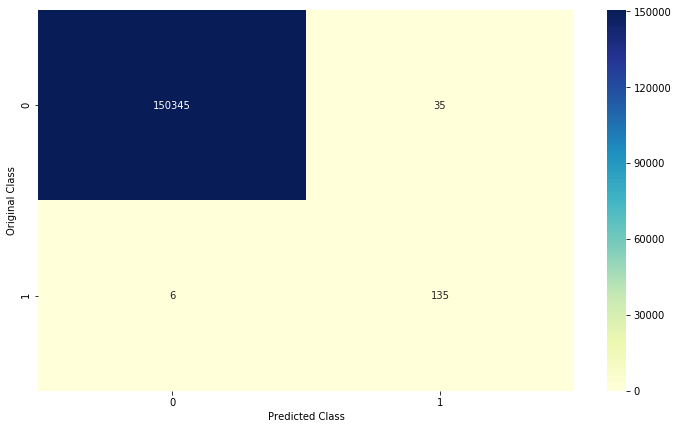

-------------------- Precision matrix (Columm Sum=1) --------------------


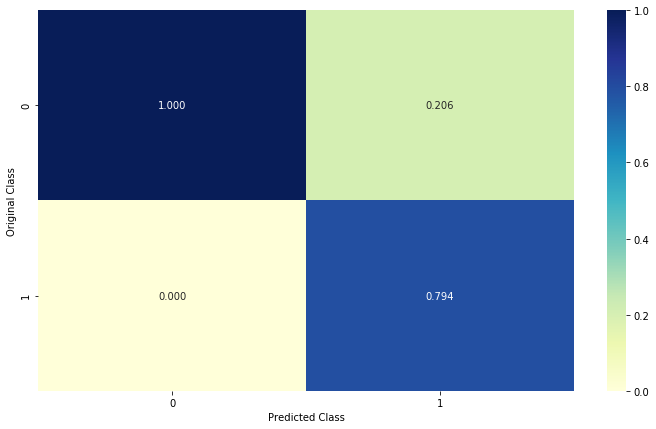

-------------------- Recall matrix (Row sum=1) --------------------


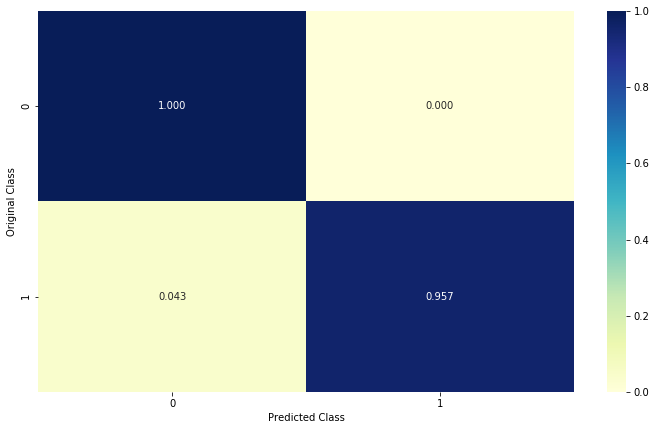

In [75]:
 print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()
    
    # representing B in heatmap format
print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [139]:
sample=pd.read_csv('C:/Users/deepak/Documents/aam case study/OP180NVHMaint_20202707.csv')

In [105]:
filename ='cat_optimal.sav'
classifier = pickle.load(open(filename, 'rb'))

In [140]:
data2= sample.drop(['STATUS','PROD_TIMESTAMP','SITENAME','LINENAME','STATIONNAME'],axis=1)

In [141]:
data2

,PARTNUMBER,TOPLEVELSERIALNUMBER,COLLID,CHARDESC,CHARVALUE
0,40217205,01A200240722,-1277705445,NVH Torque Sweep Test Cycle Count,1.000
1,40217206,01A200250294,-1277496047,NVH Torque Sweep Test Cycle Count,1.000
2,40217205,01A200240856,-1277603951,NVH Torque Sweep Test Cycle Count,1.000
3,40217206,01A200250299,-1277482133,NVH Torque Sweep Test Cycle Count,1.000
4,40217206,01C200250128,-1277482173,NVH Torque Sweep Test Cycle Count,1.000
5,40217205,01C200140771,-1277515757,NVH Torque Sweep Test Cycle Count,1.000
6,40217205,01A200230993,-1277873227,NVH Torque Sweep Test Cycle Count,1.000
7,40217205,01A200220255,-1277767687,NVH Torque Sweep Test Cycle Count,1.000
8,40217205,01A200230640,-1277526755,NVH Torque Sweep Test Cycle Count,1.000
9,40217205,01A200250361,-1277627161,NVH Torque Sweep Test Cycle Count,1.000


In [152]:
predictions=classifier.predict(data2)

In [153]:
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [156]:
 predictions=pd.DataFrame(predictions)

In [157]:
predictions.rename({0: 'P_1'}, axis=1,inplace=True)

In [159]:
predictions.P_1.value_counts()

0.0    455690
1.0       434
Name: P_1, dtype: int64